# Preamble

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from scipy import stats
import pandas as pd
import seaborn as sns
from astropy.cosmology import Planck18
from sklearn.mixture import GaussianMixture
import corner

# Figure 1 in Section 2

In [2]:
def corr_coef(var):
    with h5py.File("/mnt/home/sroy1/Data_Release/compare_pop.h5", "r") as file:
        m1 = np.array(file["m1_"+var])
        m2 = np.array(file["m2_"+var])
        z = np.array(file["z_"+var])
    file.close()
    return stats.pearsonr(m1, z)[0], stats.pearsonr(m2, z)[0]

In [3]:
variant = ['N1e7_Fiducial_AllDCO_AIS', 'N1e7_CEa025_AllDCO_AIS', 'N1e7_CEa05_AllDCO_AIS', 'N1e7_CEa075_AllDCO_AIS',
           'N1e7_FRYER2022_AllDCO_AIS', 'N1e7_MullerMandel_AllDCO_AIS', 'N1e7_zetaHG5_AllDCO_AIS', 'N1e7_zetaHG5d5_AllDCO_AIS',
           'N1e7_zetaHG6_AllDCO_AIS', 'N1e7_beta025_AllDCO_AIS', 'N1e7_beta05_AllDCO_AIS', 'N1e7_beta075_AllDCO_AIS',
           'N1e7_beta1_AllDCO_AIS', 'N1e7_ECSN10_AllDCO_AIS', 'N1e7_ECSN200_AllDCO_AIS']

rm1z = []
rm2z = []
for i in range(len(variant)):
    corr_m1z, corr_m2z = corr_coef(variant[i])
    rm1z.append(corr_m1z)
    rm2z.append(corr_m2z)
rm1z = np.abs(np.array(rm1z))
rm2z = np.abs(np.array(rm2z))

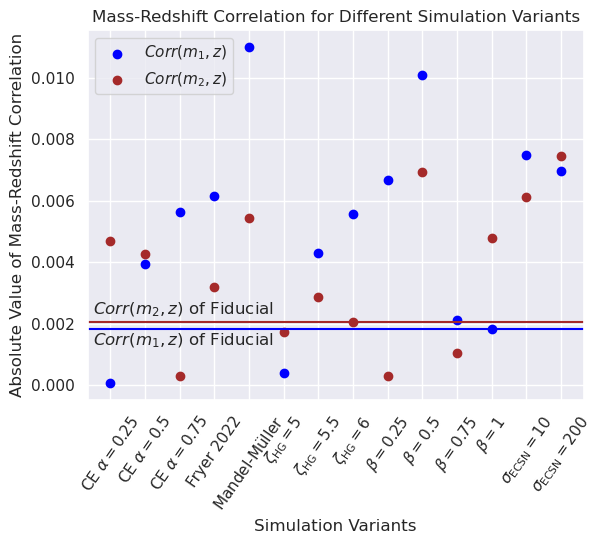

In [4]:
sns.set(font_scale=1)
plt.figure()
xlabel = [r'CE $\alpha=0.25$', r'CE $\alpha=0.5$', r'CE $\alpha=0.75$',
          'Fryer 2022', r'Mandel-M$\"\text{u}$ller',
          r'$\zeta_{\text{HG}}=5$', r'$\zeta_{\text{HG}}=5.5$', r'$\zeta_{\text{HG}}=6$',
          r'$\beta=0.25$', r'$\beta=0.5$', r'$\beta=0.75$', r'$\beta=1$', 
          r'$\sigma_{\text{ECSN}}=10$', r'$\sigma_{\text{ECSN}}=200$']
ylabel = [rm1z[1], rm1z[2], rm1z[3], rm1z[4], rm1z[5], rm1z[6], rm1z[7], rm1z[8],
          rm1z[9], rm1z[10], rm1z[11], rm1z[12], rm1z[13], rm1z[14]]
ylabel1 = [rm2z[1], rm2z[2], rm2z[3], rm2z[4], rm2z[5], rm2z[6], rm2z[7], rm2z[8], 
           rm2z[9], rm2z[10], rm2z[11], rm2z[12], rm2z[13], rm2z[14]]
plt.scatter(xlabel, ylabel, color='blue', label=r'$Corr(m_1, z)$')
plt.scatter(xlabel, ylabel1, color='brown', label=r'$Corr(m_2, z)$')
plt.axhline(rm1z[0], color='blue')
plt.axhline(rm2z[0], color='brown')
plt.xticks(rotation=55)
plt.xlabel('Simulation Variants')
plt.ylabel('Absolute Value of Mass-Redshift Correlation')
plt.legend(loc=2)
plt.text(x=-0.5, y=0.0023, s=r'$Corr(m_2, z)$ of Fiducial')
plt.text(x=-0.5, y=0.0013, s=r'$Corr(m_1, z)$ of Fiducial')
plt.title('Mass-Redshift Correlation for Different Simulation Variants')
plt.savefig('Plots/Fig1_corr.pdf', bbox_inches="tight");

# Figure 2 Left Side in Section 3

In [5]:
var = "N1e7_Fiducial_AllDCO_AIS"
with h5py.File("/mnt/home/sroy1/Data_Release/compare_pop.h5", "r") as file:
    m1_fid = np.array(file["m1_"+var])
    m2_fid = np.array(file["m2_"+var])
    z_fid = np.array(file["z_"+var])
file.close()

/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


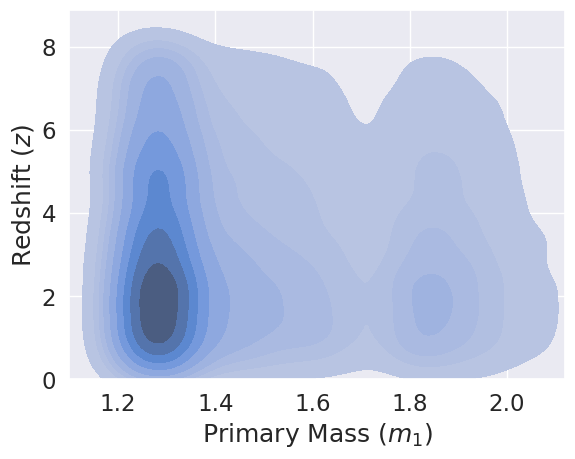

In [6]:
data = {
    r'Primary Mass ($m_1$)': m1_fid,
    r'Redshift ($z$)': z_fid
}
df = pd.DataFrame(data)

sns.set(font_scale=1.5)
sns.kdeplot(
    data=df, x=r'Primary Mass ($m_1$)', y=r'Redshift ($z$)', fill=True,
)
plt.xlim([1.1, 2.12])
plt.ylim([0.0, 8.9])
plt.savefig("Plots/Fig2_m1_z_"+var+".pdf", bbox_inches="tight");

/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


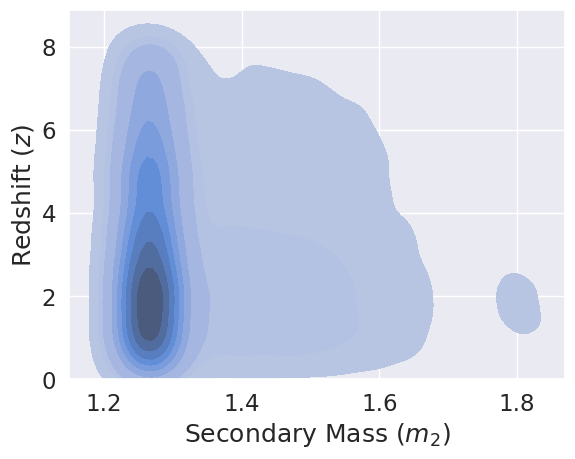

In [7]:
data = {
    r'Secondary Mass ($m_2$)': m2_fid,
    r'Redshift ($z$)': z_fid
}
df = pd.DataFrame(data)

sns.set(font_scale=1.5)
sns.kdeplot(
    data=df, x=r'Secondary Mass ($m_2$)', y=r'Redshift ($z$)', fill=True,
)
plt.xlim([1.15, 1.87])
plt.ylim([0.0, 8.9])
plt.savefig("Plots/Fig2_m2_z_"+var+".pdf", bbox_inches="tight");

In [8]:
var = "N1e7_MullerMandel_AllDCO_AIS"
with h5py.File("/mnt/home/sroy1/Data_Release/compare_pop.h5", "r") as file:
    m1_MM = np.array(file["m1_"+var])
    m2_MM = np.array(file["m2_"+var])
    z_MM = np.array(file["z_"+var])
file.close()

/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


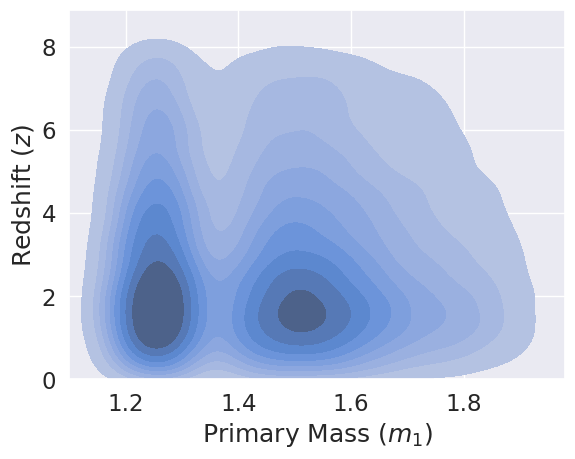

In [9]:
data = {
    r'Primary Mass ($m_1$)': m1_MM,
    r'Redshift ($z$)': z_MM
}
df = pd.DataFrame(data)

sns.set(font_scale=1.5)
sns.kdeplot(
    data=df, x=r'Primary Mass ($m_1$)', y=r'Redshift ($z$)', fill=True,
)
plt.xlim([1.1, 1.98])
plt.ylim([0.0, 8.9])
plt.savefig("Plots/Fig2_m1_z_"+var+".pdf", bbox_inches="tight");

/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


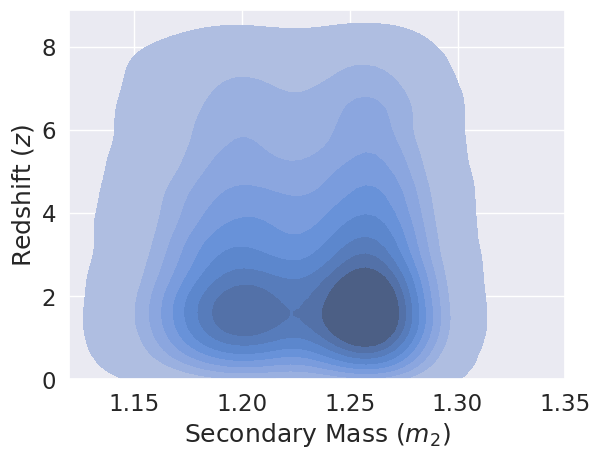

In [10]:
data = {
    r'Secondary Mass ($m_2$)': m2_MM,
    r'Redshift ($z$)': z_MM
}
df = pd.DataFrame(data)

sns.set(font_scale=1.5)
sns.kdeplot(
    data=df, x=r'Secondary Mass ($m_2$)', y=r'Redshift ($z$)', fill=True,
)
plt.xlim([1.12, 1.35])
plt.ylim([0.0, 8.9])
plt.savefig("Plots/Fig2_m2_z_"+var+".pdf", bbox_inches="tight");